In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from google.colab import drive
import cv2

In [2]:
# Step 1: Extract the image data
#drive.mount('/content/drive')
#df_breast = pd.read_pickle('/content/breast_df.pkl')
df_breast = pd.read_pickle('breast_df.pkl')

In [3]:
# Step 2: Preprocess the image data

# Resize the images
resized_images = []
desired_width = 50  # Specify the desired width for the images
desired_height = 50  # Specify the desired height for the images

for img in df_breast['image']:
    resized_img = cv2.resize(img, (desired_width, desired_height))
    resized_images.append(resized_img)

image_data = np.array(resized_images)

# Normalize the pixel values to range between 0 and 1
image_data = (image_data / 255.0) - 0.5

# Reshape the image data to have a single color channel (assuming it's RGB)
image_data = image_data.reshape(image_data.shape[0], image_data.shape[1], image_data.shape[2], 3)


In [4]:
# Step 3: Extract labels

# Convert the labels to numerical values
labels = df_breast['label']


In [5]:
# Step 4: Split the data into training and testing sets

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    image_data, labels, test_size=0.2, random_state=42
)

In [6]:
# Step 5: Build the CNN model
model = keras.Sequential([
    layers.Conv2D(8, (3, 3), activation='relu', input_shape=(image_data.shape[1], image_data.shape[2], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    #layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [7]:
# Step 6: Compile and train the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
140/140 [==============================] - 12s 8ms/step - loss: 0.2607 - accuracy: 0.8902 - val_loss: 0.1507 - val_accuracy: 0.9525
Epoch 2/20
140/140 [==============================] - 1s 5ms/step - loss: 0.1284 - accuracy: 0.9572 - val_loss: 0.1230 - val_accuracy: 0.9651
Epoch 3/20
140/140 [==============================] - 1s 5ms/step - loss: 0.0934 - accuracy: 0.9704 - val_loss: 0.0956 - val_accuracy: 0.9686
Epoch 4/20
140/140 [==============================] - 1s 5ms/step - loss: 0.0764 - accuracy: 0.9751 - val_loss: 0.1153 - val_accuracy: 0.9579
Epoch 5/20
140/140 [==============================] - 1s 5ms/step - loss: 0.0632 - accuracy: 0.9801 - val_loss: 0.0916 - val_accuracy: 0.9659
Epoch 6/20
140/140 [==============================] - 1s 5ms/step - loss: 0.0485 - accuracy: 0.9839 - val_loss: 0.0895 - val_accuracy: 0.9606
Epoch 7/20
140/140 [==============================] - 1s 5ms/step - loss: 0.0363 - accuracy: 0.9877 - val_loss: 0.0739 - val_accuracy: 0.9722
Epoch

35/35 [==============================] - 0s 3ms/step - loss: 0.1051 - accuracy: 0.9731
Test loss: 0.10511473566293716
Test accuracy: 0.9731183052062988
35/35 [==============================] - 0s 2ms/step
Accuracy: 0.9731182795698925
Confusion Matrix:
[[527  18]
 [ 12 559]]
Sensitivity/Recall: 0.978984238178634
Specificity: 0.9669724770642202
Precision: 0.9688041594454073
Negative Predictive Value: 0.9777365491651205
F1 Score: 0.9738675958188153
Matthews Correlation Coefficient: 0.9462486668740191
Recall: 0.978984238178634


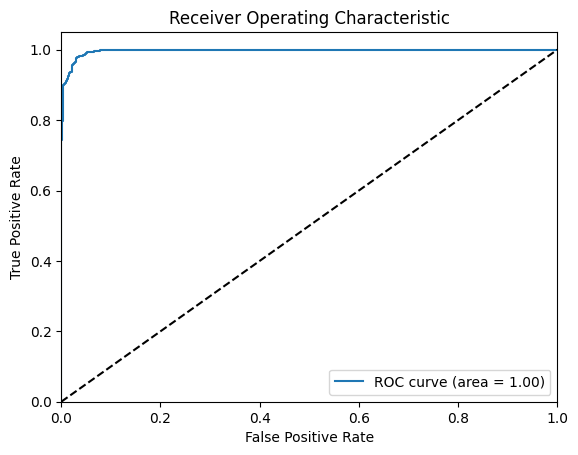

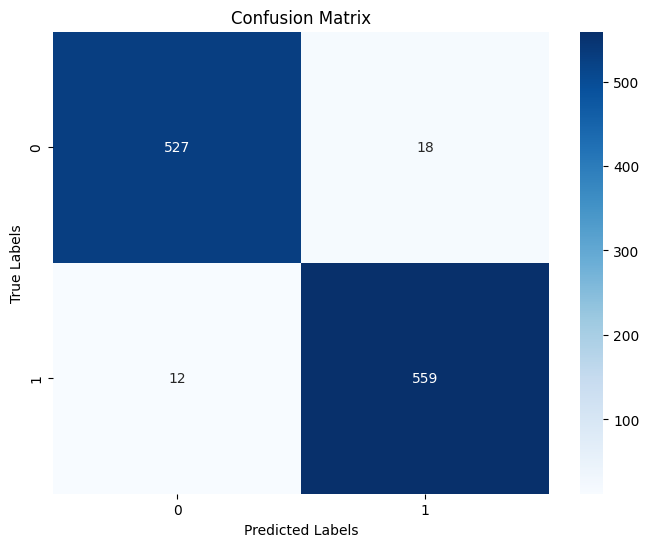

In [8]:
# Step 7: Evaluate the model

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

# Calculate additional metrics
predictions = model.predict(test_images)

# Apply threshold to obtain binary predictions
threshold = 0.5
binary_predictions = np.where(predictions >= threshold, 1, 0)

# Accuracy
accuracy = accuracy_score(test_labels, binary_predictions)
print(f'Accuracy: {accuracy}')

# Confusion matrix
confusion = confusion_matrix(test_labels, binary_predictions)
print("Confusion Matrix:")
print(confusion)

# True positive (TP), true negative (TN), false positive (FP), false negative (FN)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Sensitivity, Recall, Hit Rate, or True Positive Rate (TPR)
sensitivity = TP / (TP + FN)
print(f'Sensitivity/Recall: {sensitivity}')

# Specificity or True Negative Rate (TNR)
specificity = TN / (TN + FP)
print(f'Specificity: {specificity}')

# Precision or Positive Predictive Value (PPV)
precision = TP / (TP + FP)
print(f'Precision: {precision}')

# Negative Predictive Value (NPV)
npv = TN / (TN + FN)
print(f'Negative Predictive Value: {npv}')

# F1 Score (Harmonic mean of precision and recall)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
print(f'F1 Score: {f1_score}')

# Matthews Correlation Coefficient (MCC)
mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
print(f'Matthews Correlation Coefficient: {mcc}')

# Recall
recall = sensitivity
print(f'Recall: {recall}')

# Receiver Operating Characteristic (ROC) Curve
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


import seaborn as sns

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

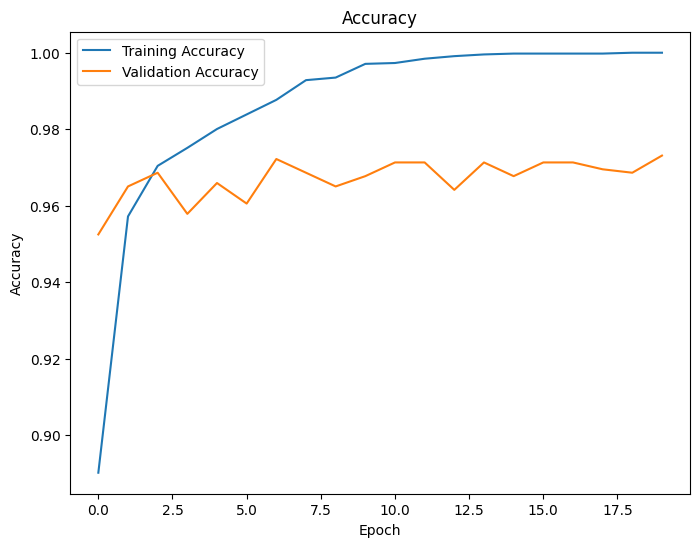

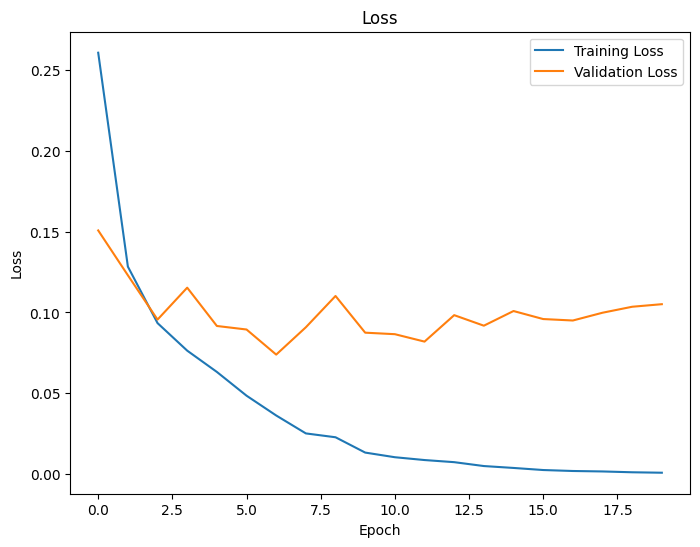

In [9]:
# Step 8: Plot accuracy and loss curves

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# Guardar el modelo
model.save('./sample_data/breast_model.h5')